https://colab.research.google.com/drive/1JtHSP8iNzBdCE98r5FJsDCoY7yaWxzGr#scrollTo=SV4DeKF9GB3A

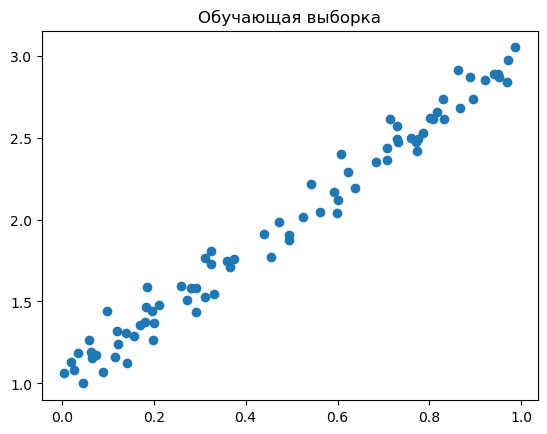

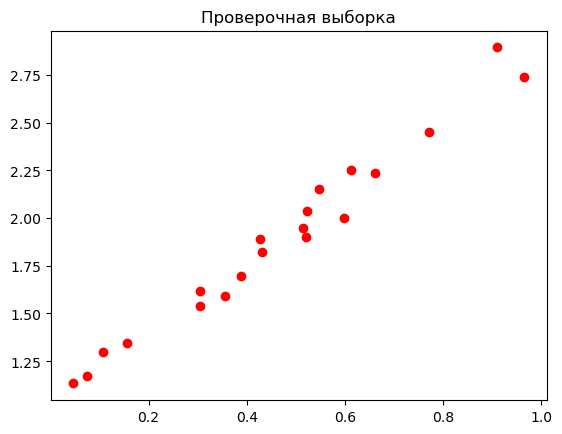

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# инициализация повторяемой последовательности случайных чисел
np.random.seed(42)

# создаём np-массив из 100 случайных чисел в диапазоне 0..1
sz = 100
x = np.random.rand(sz, 1)

# строим функцию y = f(x) и добавляем немного гауссова шума
y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)

# формируем индексы от 0 до 99
idx = np.arange(sz)
# случайно их тасуем
np.random.shuffle(idx)

# первые 80 случайных индексов (значений x) используем для обучения
sz80 = int(sz * 0.8)
train_idx = idx[:sz80]

# оставшиеся 20 -- для валидации
val_idx = idx[sz80:]

# формируем наборы обучающих данных
x_train, y_train = x[train_idx], y[train_idx]

# и наборы для валидации
x_val, y_val = x[val_idx], y[val_idx]

# выводим на экран
plt.scatter(x_train, y_train)
plt.title('Обучающая выборка')
plt.show()
plt.scatter(x_val, y_val, color= "red")
plt.title('Проверочная выборка')
plt.show()

In [3]:
# задаём начальные случайные значения коэффициентам линейной регрессии
a = np.random.randn(1)
b = np.random.randn(1)
print(a,b)

# скорость обучения
lr = 0.1
# количество эпох
n_epochs = 1000

# основной цикл
for epoch in range(n_epochs):

    # рассчитываем результирующий массив с текущими коэффициентами a и b
    # на основе обучающей выборки
    yhat = a + b * x_train

    # 1. определяем лосс
    # сперва считаем отклонение нового результата от обучающего:
    error = (y_train - yhat)
    # и затем считаем среднеквадратическую ошибку:
    loss = (error ** 2).mean()

    # 2. считаем градиенты (вспоминая формулу производной)
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (x_train * error).mean()

    # 3. обновляем параметры, используя коэффициент скорости обучения,
    # градиенты берём с обратным знаком
    a = a - lr * a_grad
    b = b - lr * b_grad
print(a,b)

[-2.02514259] [0.18645431]
[1.02354078] [1.96896443]


In [5]:
import torch
torch.cuda.is_available()  # AAAAAAAAAAAA FINALLY

True

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Наши исходные данные хранятся в формате массивов NumPy,
# требуется преобразовать их в формат тензоров PyTorch,
# привести к типу float и выгрузить на девайс
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print(x_train_tensor.type())

cuda
torch.cuda.FloatTensor


In [8]:
torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [10]:
learn_rate = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # Find loss
    loss.backward()

    # Turn on mutable transformation
    with torch.no_grad():
        a -= learn_rate * a.grad
        b -= learn_rate * b.grad
        
    # Set grads to 0 to prevent accumilation
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [11]:
%pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 692.1 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/fe/d3/e1aa96437d944fbb9cc95d0316e25583886e9cd9e6adc07baad943524eda/fsspec-2023.9.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=919a085d14f763c16e6fdbd1b17bf88fb23e8ca4d56b321fb1c5aecf35bade49
  Stored in directory: /home/user/.cache/pip/wheels/5a/d0/3f/b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz


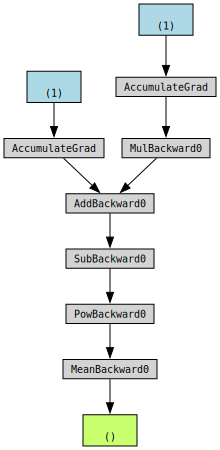

In [13]:
import torchviz

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

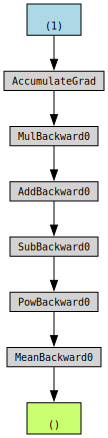

In [14]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

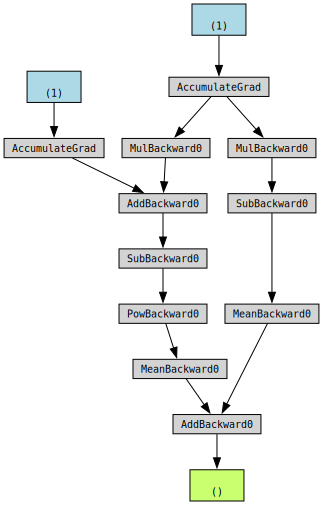

In [15]:
import torchviz

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

# это полная чушь! этот код только для демонстрации разветвления в графе!
if loss > 0:
  yhat2 = b * x_train_tensor
  error2 = y_train_tensor - yhat2

loss += error2.mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

In [16]:
from torch import optim

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    loss.backward()

    # with torch.no_grad():
    #    a -= lr * a.grad
    #    b -= lr * b.grad
    optimizer.step()

    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()

print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [17]:
from torch import optim, nn

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

# функция расчёта лосса
loss_fn = nn.MSELoss(reduction='mean')

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor

    # error = y_train_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)
